In [1]:
#Set up and Read the data
import pandas as pd
import numpy as np

#Algorith and Elbow visualiser
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

#Scaling
from sklearn.preprocessing import MinMaxScaler


In [2]:
# read csv file
df_Fact = pd.read_csv('/content/rfm.csv')


In [3]:
df_Fact

,CustomerID,Recency,Frequency,Monetary
0,C1010011_1983-08-05_M,74,1,356.0
1,C1010011_1992-08-19_F,26,1,4750.0
2,C1010012_1994-07-28_M,69,1,1499.0
3,C1010014_1984-08-19_M,76,1,250.0
4,C1010014_1992-06-04_F,82,1,1205.0
...,...,...,...,...
1039170,C9099836_1990-12-24_M,76,1,691.0
1039171,C9099877_1996-06-09_M,37,1,222.0
1039172,C9099919_1993-10-21_M,65,1,126.0
1039173,C9099941_1995-04-22_M,55,1,50.0


In [4]:
#Dropping customerid as it's not useful in our model
df_Fact.drop(columns=["CustomerID"],inplace=True)
#Renaming column
df_Fact.rename(columns={"Monetary": "MonetaryValue"},inplace=True)
df_Fact

,Recency,Frequency,MonetaryValue
0,74,1,356.0
1,26,1,4750.0
2,69,1,1499.0
3,76,1,250.0
4,82,1,1205.0
...,...,...,...
1039170,76,1,691.0
1039171,37,1,222.0
1039172,65,1,126.0
1039173,55,1,50.0


Considering we are using Kmeans algorithm, we need to transform and scale data and the algorithm works primarily on distance.

In [5]:
#Applying MinMax scaler and a log tranformation
#log transform
df_log=np.log1p(df_Fact)

#Minmax
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_log)

#returning the scaled data to the dataframe
df = pd.DataFrame(df_scaled, columns=df_Fact.columns)
df

,Recency,Frequency,MonetaryValue
0,0.972796,0.0,0.411767
1,0.698579,0.0,0.593404
2,0.954278,0.0,0.512501
3,0.979860,0.0,0.387046
4,1.000000,0.0,0.497192
...,...,...,...
1039170,0.979860,0.0,0.458211
1039171,0.790306,0.0,0.378745
1039172,0.938485,0.0,0.339238
1039173,0.894385,0.0,0.275214


Text(0.5, 1.0, 'Histogram and Recency')

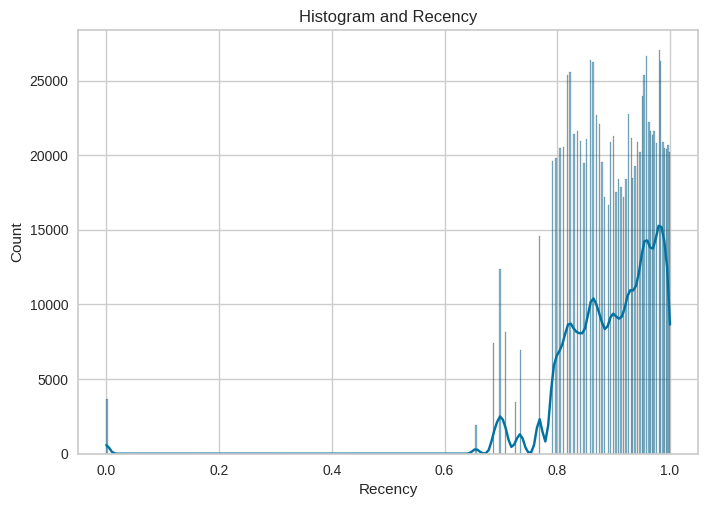

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.histplot(data=df, x='Recency', kde=True)
ax.set_title('Histogram and Recency')

Text(0.5, 1.0, 'Histogram and Frequency')

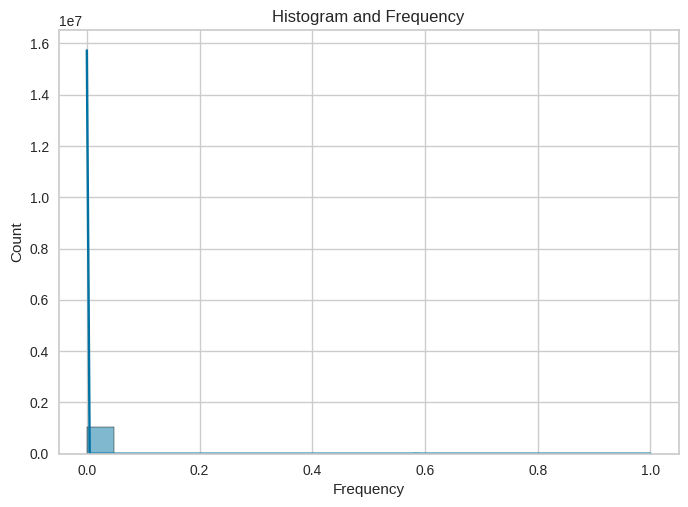

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.histplot(data=df, x='Frequency', kde=True)
ax.set_title('Histogram and Frequency')

Text(0.5, 1.0, 'Histogram and MonetaryValue')

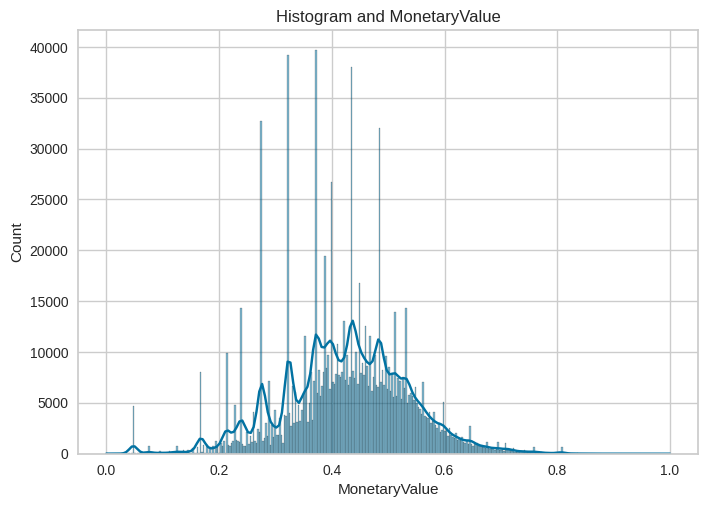

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.histplot(data=df, x='MonetaryValue', kde=True)
ax.set_title('Histogram and MonetaryValue')

<ipython-input-9-28f605e1f293>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(df['Recency'])
<ipython-input-9-28f605e1f293>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(df['Frequency'])
<ipython-input-9-28f605e1f293>:8: UserWarning: 

`distplot` 

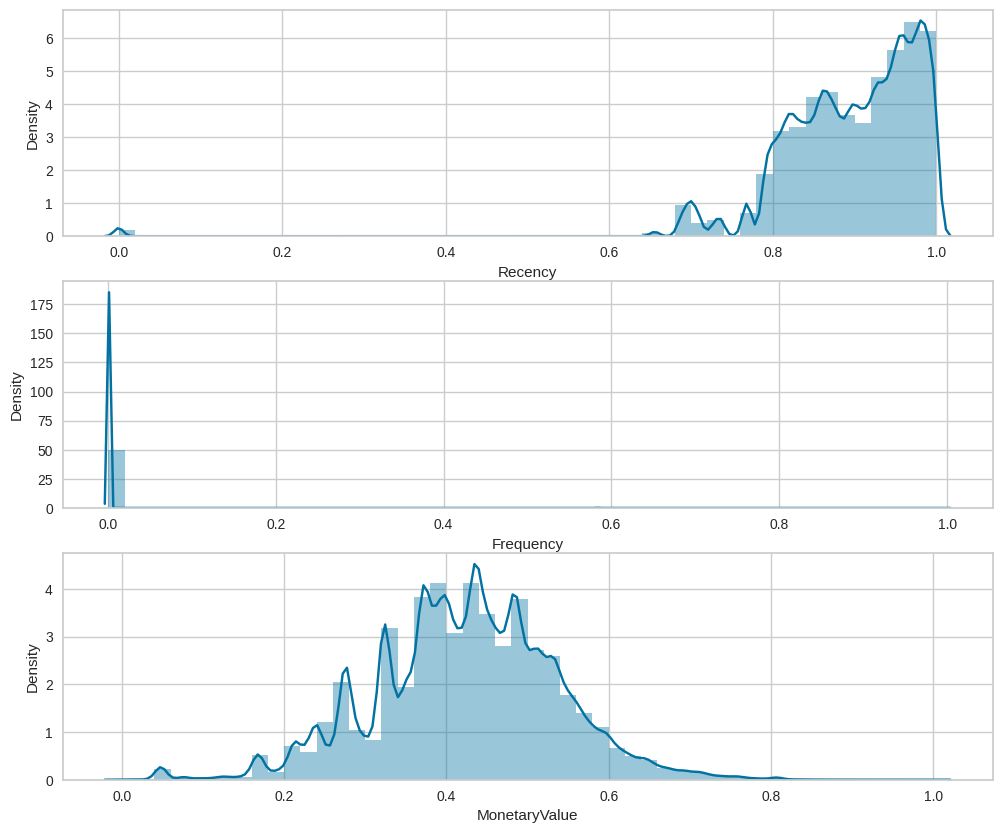

In [9]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(df['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(df['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(df['MonetaryValue'])
# Show the plot
plt.show()

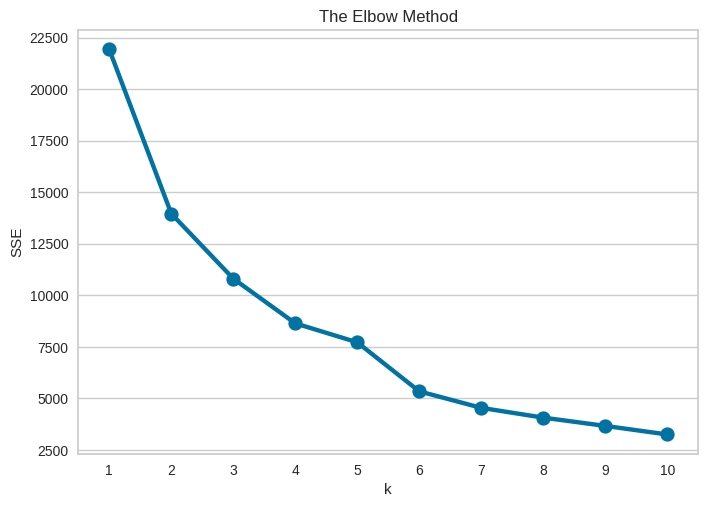

In [10]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

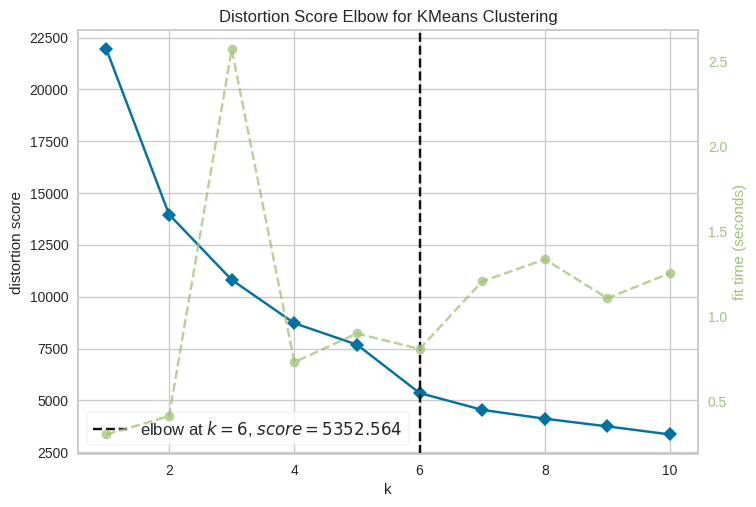

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))
visualizer.fit(df)
visualizer.show()

In [12]:
#Creating mdel
model = KMeans(n_clusters=5, random_state=42)
model.fit(df)
model.labels_.shape


(1039175,)

In [13]:
df["Cluster"] = model.labels_
df.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue        
           mean      mean          mean   count
Cluster                                        
0          0.93       0.0          0.57  200129
1          0.93       0.0          0.26  167282
2          0.95       0.0          0.43  341760
3          0.78       0.0          0.49  137087
4          0.83       0.0          0.37  192917

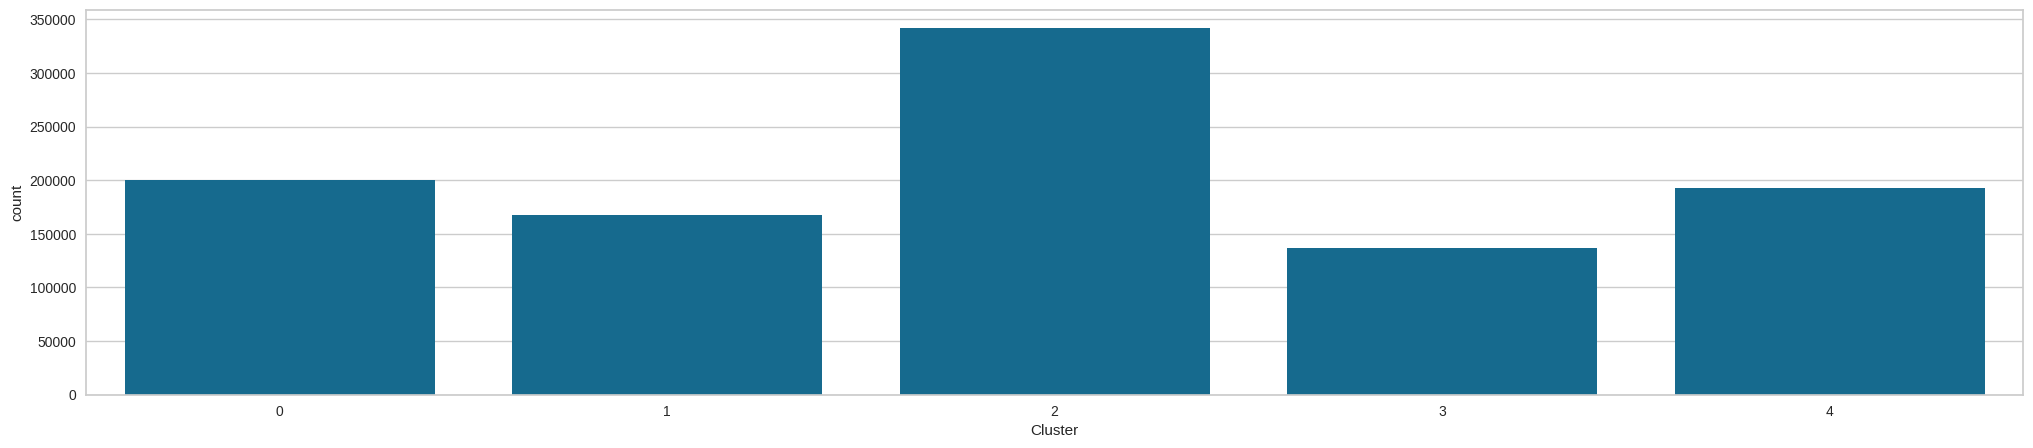

In [14]:
#Visualising cluster based on count
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="Cluster", data=df)


In [15]:
#Centroid values
centroids = kmeans.cluster_centers_
print(centroids)

[[ 9.23683455e-01 -7.31836466e-16  6.34810909e-01]
 [ 9.56372573e-01  8.91647867e-16  3.80068430e-01]
 [ 9.41735225e-01 -7.67940399e-16  2.29121520e-01]
 [ 2.77357392e-04  9.65019248e-04  4.29898334e-01]
 [ 8.28624420e-01 -7.72277207e-16  2.86564967e-01]
 [ 8.38163746e-01  1.14968798e-15  5.25297446e-01]
 [ 8.49630855e-01  2.64024913e-15  4.11066079e-01]
 [ 9.55981638e-01  1.68734384e-15  4.95483620e-01]
 [ 8.65113833e-01  5.86340219e-01  4.71984569e-01]
 [ 7.15886320e-01 -6.07478477e-16  4.33664751e-01]]


**Considering we log transformed and scaled our data using MinMax, this makes it impossible to interept our results reasonably hence why we need to undo all of that to interpret our results effectively**

In [16]:
df

,Recency,Frequency,MonetaryValue,Cluster
0,0.972796,0.0,0.411767,2
1,0.698579,0.0,0.593404,3
2,0.954278,0.0,0.512501,0
3,0.979860,0.0,0.387046,2
4,1.000000,0.0,0.497192,2
...,...,...,...,...
1039170,0.979860,0.0,0.458211,2
1039171,0.790306,0.0,0.378745,4
1039172,0.938485,0.0,0.339238,1
1039173,0.894385,0.0,0.275214,1


In [17]:
df_column= ['Recency', 'Frequency', 'MonetaryValue']

#Undo MinMax Scaling
df_logged = scaler.inverse_transform( df[df_column])

#Converting to dataframe
df_new = pd.DataFrame(df_logged, columns=df_column)

#Undo Log Transform
df_original = np.expm1(df_new)

#Add back cluster labels if needed
df_original['Cluster'] = df['Cluster']

df_original.head()

,Recency,Frequency,MonetaryValue,Cluster
0,74.0,1.0,356.0,2
1,26.0,1.0,4750.0,3
2,69.0,1.0,1499.0,0
3,76.0,1.0,250.0,2
4,82.0,1.0,1205.0,2


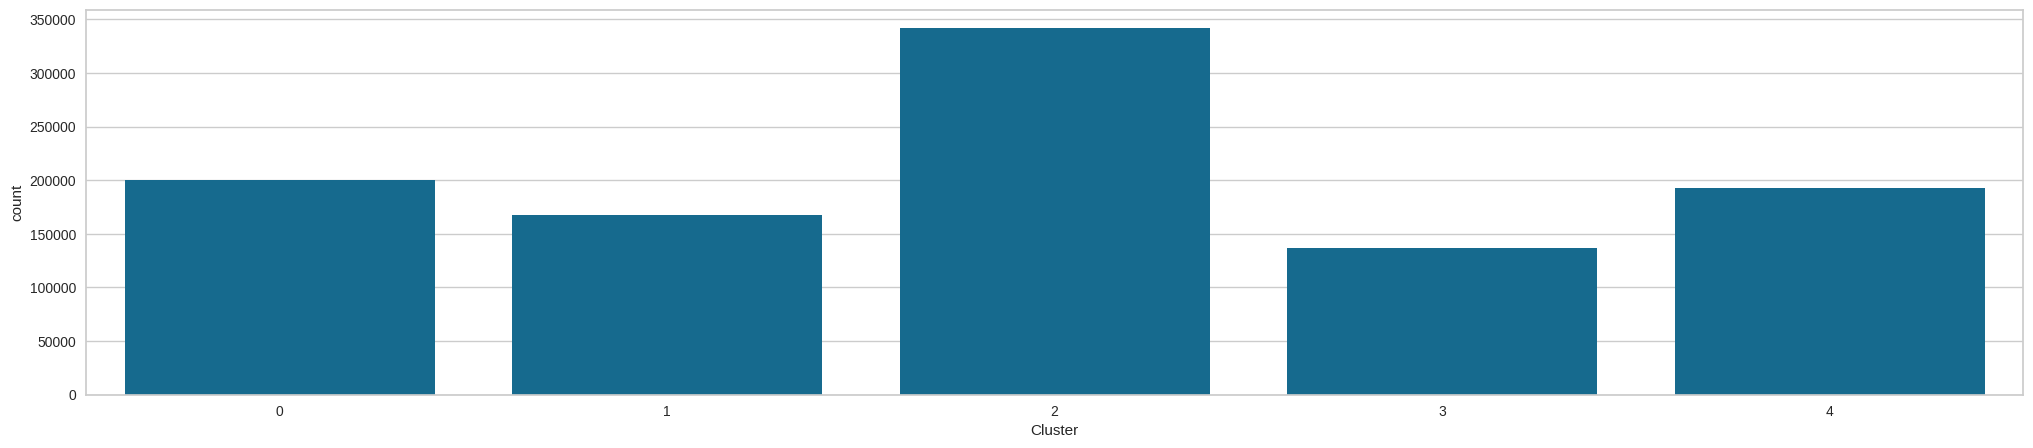

In [18]:
#Visualising
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="Cluster", data=df_original)


In [19]:
df_original.Frequency.value_counts()

,count
Frequency,
1.0,1037964
2.0,1207
3.0,4


In [20]:
#Interpreting results by mean
df_original.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue        
           mean      mean          mean   count
Cluster                                        
0         62.90       1.0       5887.72  200129
1         63.11       1.0         52.63  167282
2         68.21       1.0        526.06  341760
3         37.82       1.0       1602.74  137087
4         43.61       1.0        224.03  192917

From the result, we have the following insight;
Since a majority of the bank's customers do not repeat transaction(they only used the bank once), it is reasonable to see it carry on in our model.

* Cluster 0 has wealthiest individuals that spend a lot of money, an average of **5887.63** rupies; making said purchase once at **63.90** days from the last date on the calendar.

* Cluster 1 has the poorest of the bank customers spending an average of **52.63** rupies once around **63.11** days from the last date on the calender.

* Cluster 2 consist of the middle class customers spending on average **526.06** rupies once arounf **68.21** days from the last date on the calendar.

* Cluster 3 is considered the upper middle class spending on average **1602.74** rupies once **37.82** days(later in the year) from the last date on the calendar.

* Cluster 4 has the lower middle class customers spending on average **224.03** rupies once **43.61**days from the last date on the calendar.